In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from src.data import AirbusDataset
from PIL import Image
import pandas as pd

In [2]:
data_dir = Path('data') / 'processed'
dataset = AirbusDataset(data_dir / 'train_ship_segmentations.csv', data_dir / 'train')

### Check ratio of empty images to images with ships in the raw dataset

In [3]:
df = pd.read_csv(Path('data') / 'raw' / 'train_ship_segmentations_v2.csv')
df['EncodedPixels'] = df['EncodedPixels'].fillna('')
df = df.groupby(['ImageId']).agg({'EncodedPixels': ' '.join})

contains_ship = len(df[df['EncodedPixels'] != ''])
ds_len = len(df)

print(f'In the raw dataset, {contains_ship} images of {ds_len} contain a ship (ratio: {contains_ship / ds_len})')

In the raw dataset, 42556 images of 192556 contain a ship (ratio: 0.2210058372629261)


### Check ratio of empty images to images with ships in the processed dataset

In [4]:
df = pd.read_csv(data_dir / 'train_ship_segmentations.csv')
df['EncodedPixels'] = df['EncodedPixels'].fillna('')
df = df.groupby(['ImageId']).agg({'EncodedPixels': ' '.join})

contains_ship = len(df[df['EncodedPixels'] != ''])
ds_len = len(df)

print(f'In the processed dataset, {contains_ship} images of {ds_len} contain a ship (ratio: {contains_ship / ds_len})')

In the processed dataset, 17570 images of 80000 contain a ship (ratio: 0.219625)


### Show images with ships

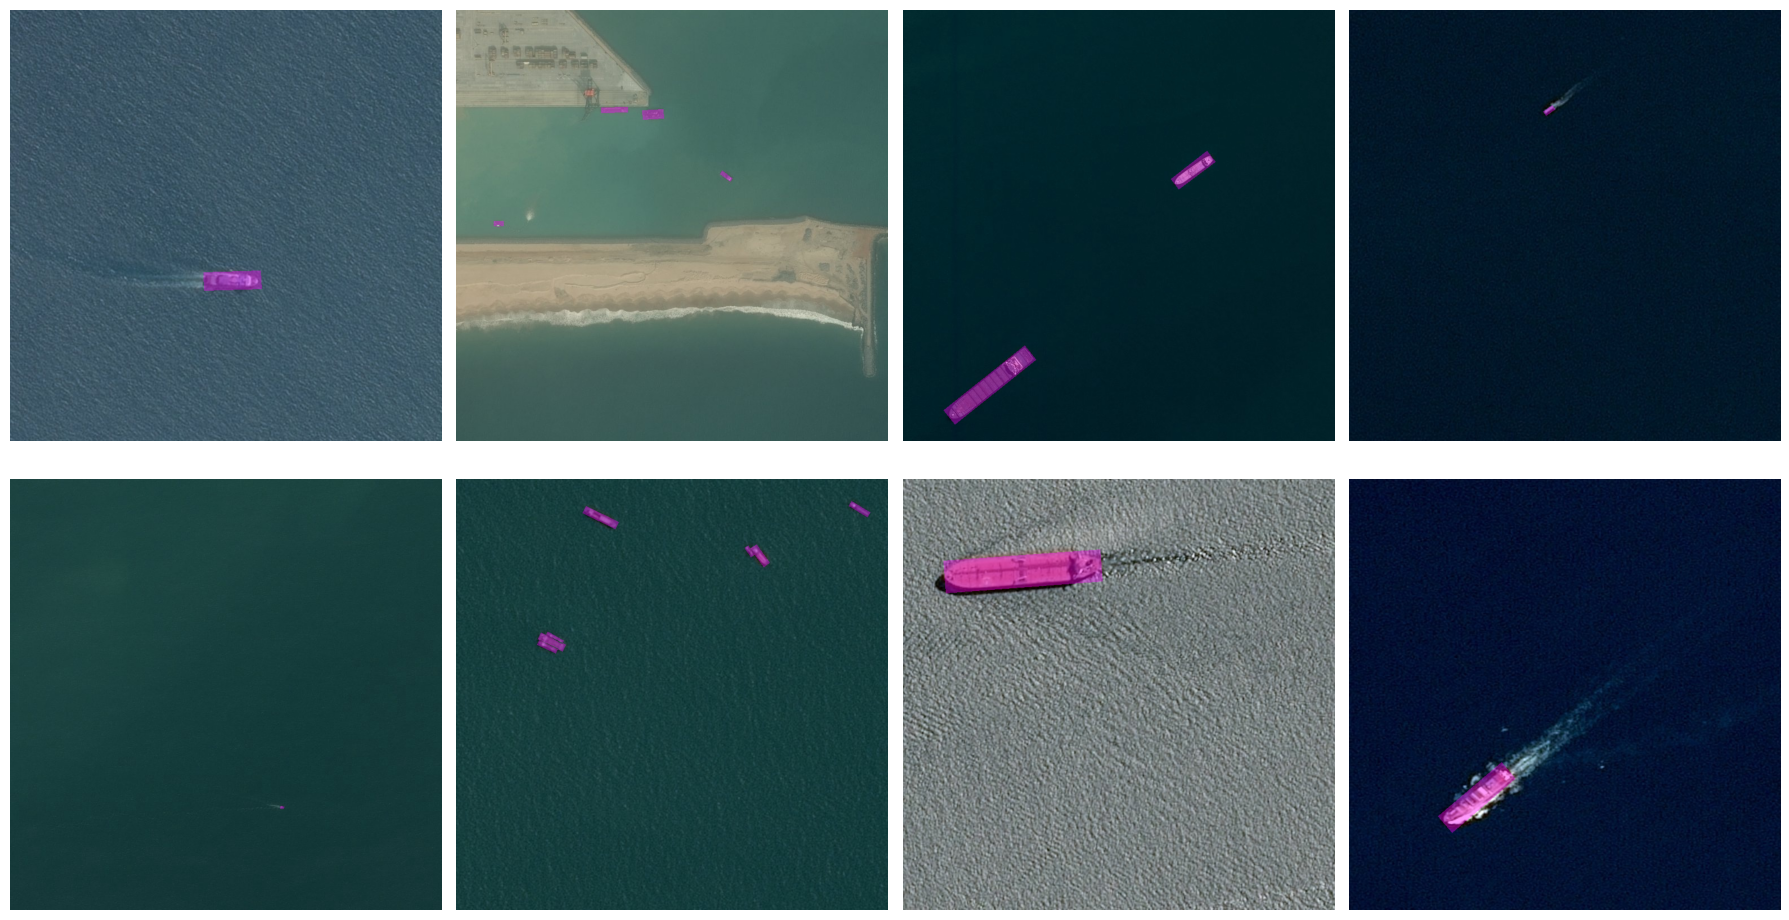

In [5]:
N = 8

plt.figure(figsize=(18, 10))
shown, offset = 0, 0
while shown < N:
    image, segmentation = dataset[offset]

    if np.any(segmentation):
        image = image.convert('RGBA')
        img_mask = np.zeros((image.height, image.width, 4), dtype=np.int8)
        img_mask[segmentation] = np.array([255, 0, 255, 100])

        image.alpha_composite(Image.fromarray(img_mask, 'RGBA'))

        plt.subplot(2, N//2, shown+1)
        plt.imshow(image)
        plt.axis('off')

        shown += 1

    offset += 1
plt.tight_layout()